In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
titanic=pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()*100/titanic.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
titanic.duplicated().sum()

0

In [90]:
titanic.shape

(891, 12)

In [94]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [98]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [118]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [120]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Figure size 1000x300 with 0 Axes>

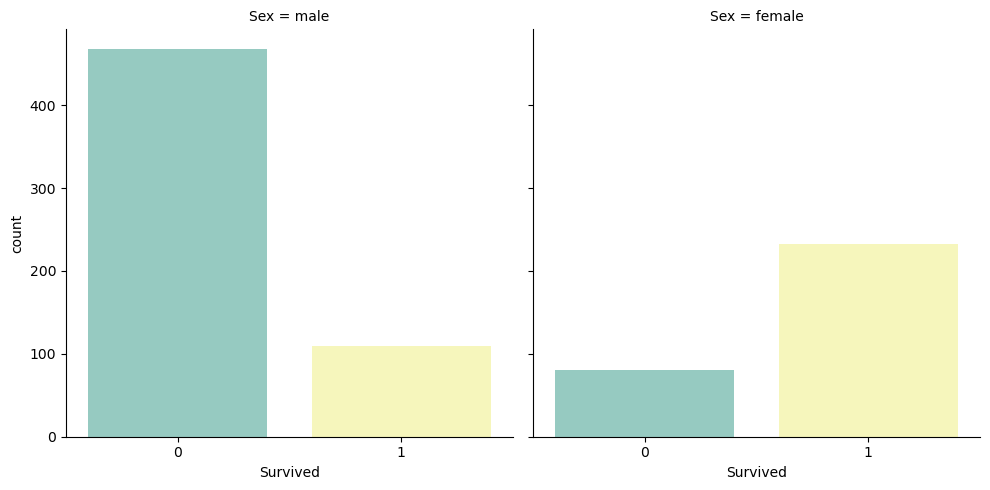

In [122]:
plt.figure(figsize=(10,3))
sns.catplot(x='Survived',data=titanic,col='Sex',kind='count',palette='Set3')
plt.show()

<Figure size 1000x300 with 0 Axes>

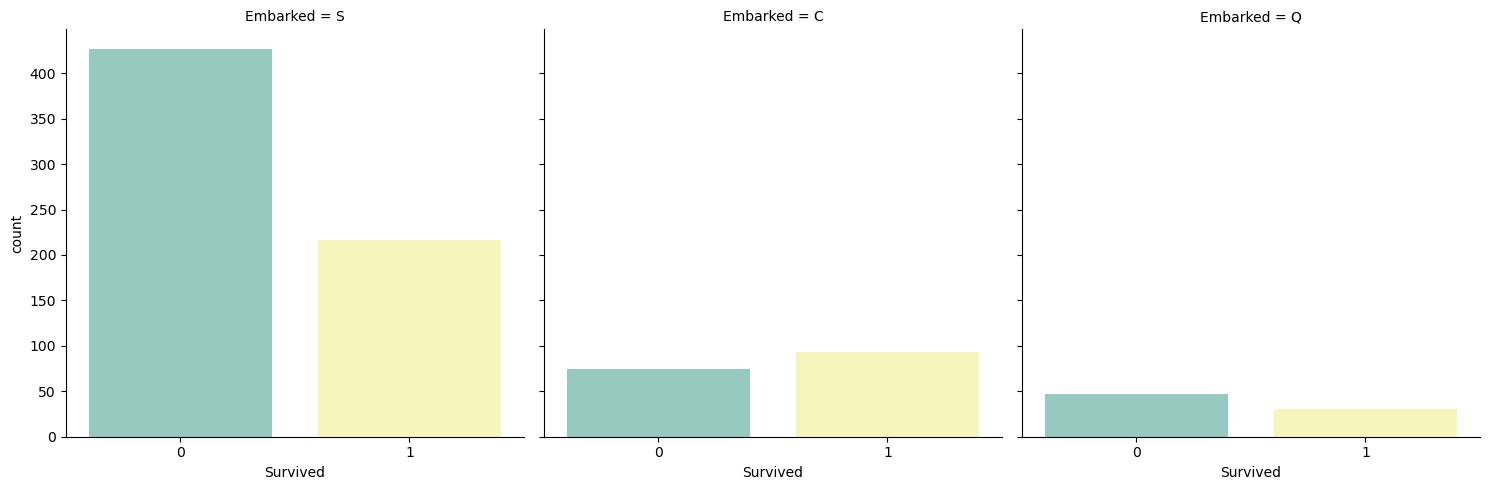

In [126]:
plt.figure(figsize=(10,3))
sns.catplot(kind='count',col='Embarked',data=titanic,x='Survived',palette='Set3')

<Figure size 1000x300 with 0 Axes>

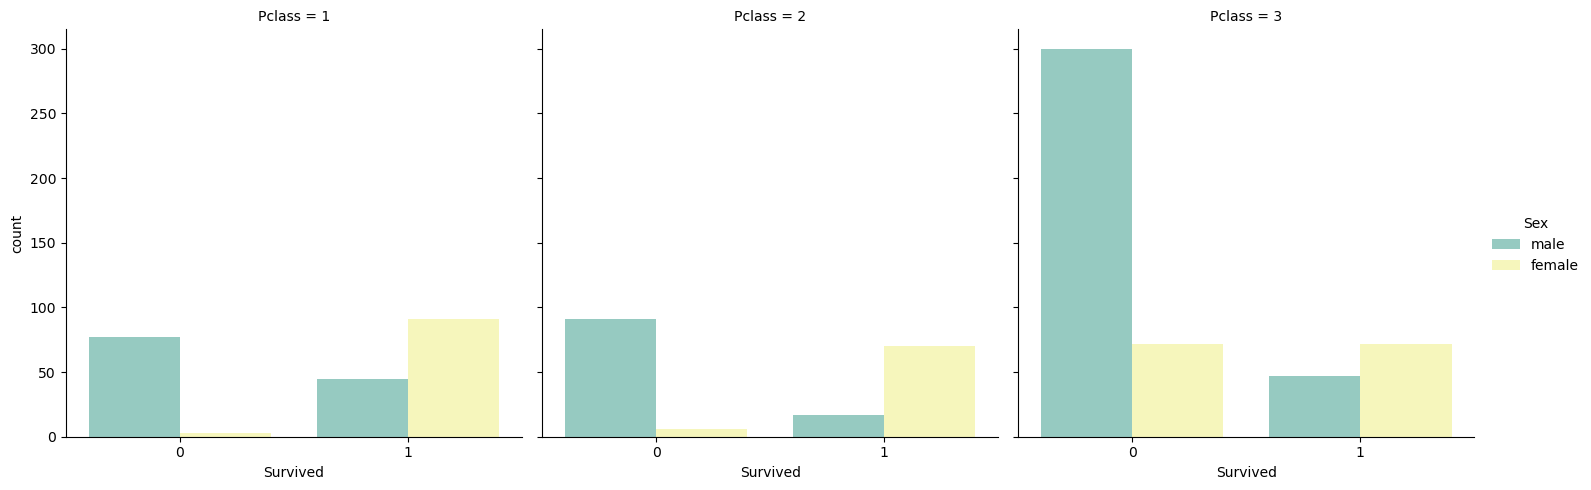

In [130]:
plt.figure(figsize=(10,3))
sns.catplot(kind='count',col='Pclass',hue='Sex',data=titanic,x='Survived',palette='Set3')

<Axes: xlabel='Pclass', ylabel='Age'>

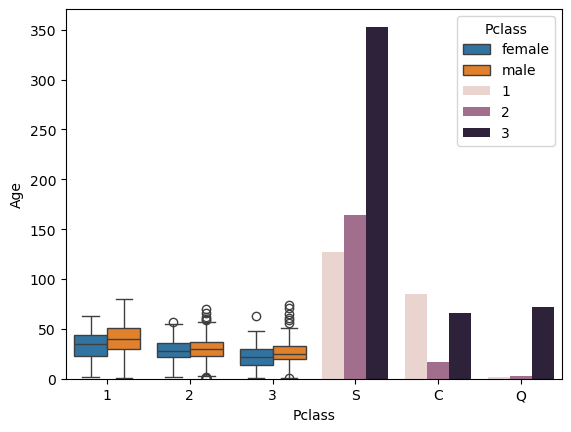

In [132]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic)
sns.countplot(x='Embarked', hue='Pclass', data=titanic)

In [136]:
pd.crosstab(titanic.Survived,titanic.Sex,normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [142]:
pd.crosstab(titanic.Survived,titanic.Embarked,normalize='index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.273529,0.088235,0.638235


In [146]:
pd.crosstab(titanic.Survived,titanic.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Age', ylabel='Count'>

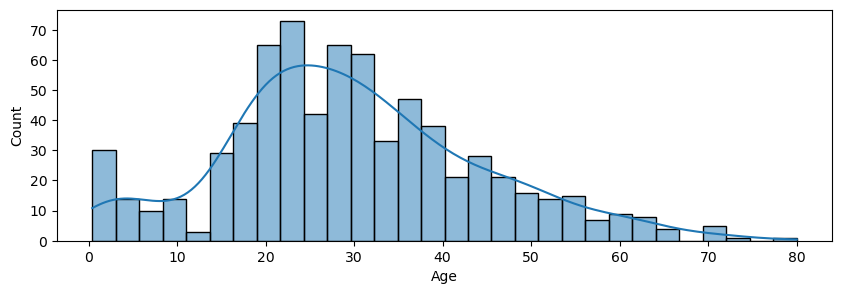

In [150]:
plt.figure(figsize=(10,3))
sns.histplot(titanic['Age'].dropna(),kde=True,bins=30)

In [9]:
t_model=titanic.copy()
t_model.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

t_model['Age']=t_model.groupby(['Sex','Pclass'])['Age'].transform(lambda x:x.fillna(x.median()))

t_model['Embarked']=t_model.groupby('Pclass')['Embarked'].transform(lambda x:x.fillna(x.mode()[0]))

t_model=pd.get_dummies(t_model,columns=['Embarked','Sex'],drop_first=True)
for col in t_model.select_dtypes(include='bool').columns:
    t_model[col]=t_model[col].map({True:1,False:0})

In [10]:
t_model.shape

(891, 9)

In [11]:
t_model.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


<Axes: ylabel='Age'>

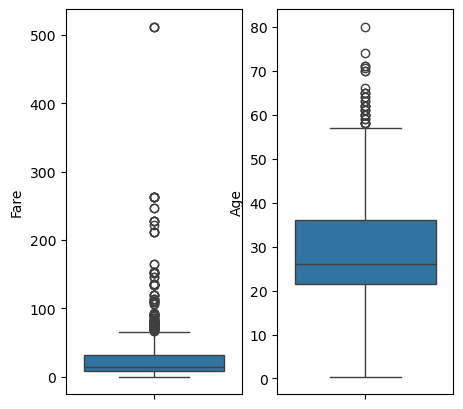

In [12]:
fig,axs=plt.subplots(1,2,figsize=(5,5))
sns.boxplot(t_model['Fare'],ax=axs[0])
sns.boxplot(t_model['Age'],ax=axs[1])

<Axes: ylabel='Fare'>

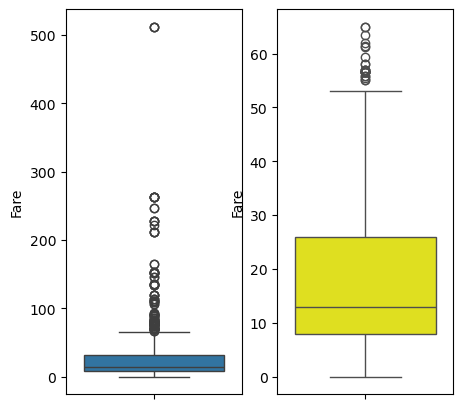

In [13]:
fig,axs=plt.subplots(1,2,figsize=(5,5))
sns.boxplot(t_model['Fare'],ax=axs[0])
Q1=t_model.Fare.quantile(0.25)
Q3=t_model.Fare.quantile(0.75)
IQR=Q3-Q1
t_model=t_model[(t_model.Fare>Q1-1.5*IQR) & (t_model.Fare<1.5*IQR+Q3)] 
sns.boxplot(t_model['Fare'],ax=axs[1],color='yellow')

<Axes: ylabel='Fare'>

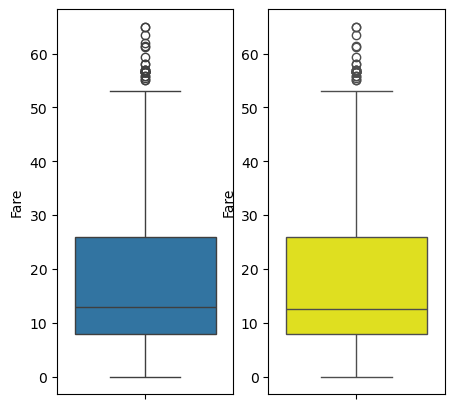

In [14]:
fig,axs=plt.subplots(1,2,figsize=(5,5))
sns.boxplot(t_model['Fare'],ax=axs[0])
Q1=t_model.Age.quantile(0.25)
Q3=t_model.Age.quantile(0.75)
IQR=Q3-Q1
t_model=t_model[(t_model.Age>Q1-1.5*IQR) & (t_model.Age<1.5*IQR+Q3)] 
sns.boxplot(t_model['Fare'],ax=axs[1],color='yellow')

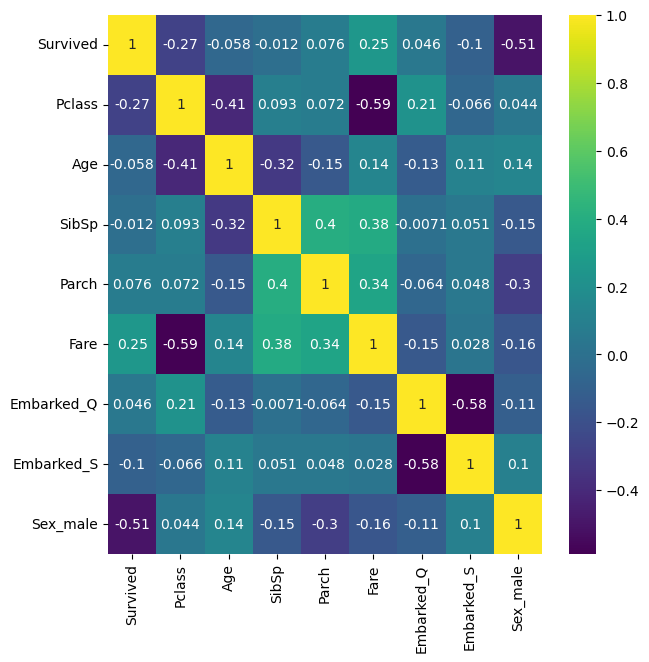

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(t_model.corr(),annot=True,cmap='viridis')
plt.show()

In [23]:
# X=t_model.drop(['Survived'],axis=1)
# y=t_model['Survived']

In [28]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [29]:
df_train,df_test=train_test_split(t_model,train_size=0.8,test_size=0.2,random_state=101)
X_train=df_train
X_test=df_test
y_train=df_train.pop('Survived')
y_test=df_test.pop('Survived')

In [31]:
X_train['Family_size']=X_train['Parch']+X_train['SibSp']
X_test['Family_size']=X_test['Parch']+X_test['SibSp']

X_train.drop(columns=['Parch','SibSp'],inplace=True)
X_test.drop(columns=['Parch','SibSp'],inplace=True)

# with both column accuracy was higher slightly

In [33]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [35]:
X_train.head()

,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,Family_size
25,3,38.0,31.3875,0,1,0,6
631,3,51.0,7.0542,0,1,1,0
784,3,25.0,7.0500,0,1,1,0
20,2,35.0,26.0000,0,1,1,0
176,3,25.0,25.4667,0,1,1,4


In [36]:
scaller=RobustScaler()
X_train=scaller.fit_transform(X_train)
X_test=scaller.transform(X_test)

In [43]:
X_test.shape

(147, 7)

In [47]:
X_train.shape

(585, 7)

In [49]:
y_train.shape

(585,)

In [51]:
y_test.shape

(147,)

In [53]:
df = pd.DataFrame(X_train, columns=['Pclass','Age','Family_size','Fare','Embarked_Q','Embarked_Q','Sex_male'])

In [84]:
logistc_r=LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
logistc_r.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [86]:
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Family_size,2.40
0,Pclass,2.36
4,Embarked_Q,1.98
3,Fare,1.85
6,Sex_male,1.79
5,Embarked_Q,1.52
1,Age,1.31


In [88]:
y_train_pred=logistc_r.predict(X_train)
y_test_pred=logistc_r.predict(X_test)

y_train_pred
y_test_pred
# only for linear Regression model
# r2=r2_score(y_test,y_test_pred)

# for Logistic Regrssion model:
report=classification_report(y_test,y_test_pred)


print('Accuracy of Logistic Regression model based on test is  : ', (metrics.accuracy_score(y_test, y_test_pred)))
print('Accuracy of Logistic Regression model based on train is  : ', (metrics.accuracy_score(y_train, y_train_pred)))
print('R squared',report )

Accuracy of Logistic Regression model based on test is  :  0.8027210884353742
Accuracy of Logistic Regression model based on train is  :  0.7931623931623931
R squared               precision    recall  f1-score   support

           0       0.83      0.89      0.86        98
           1       0.74      0.63      0.68        49

    accuracy                           0.80       147
   macro avg       0.78      0.76      0.77       147
weighted avg       0.80      0.80      0.80       147

